In [198]:
import numpy as np
import matplotlib.pyplot as plt
import random
from numpy import genfromtxt
from scipy.stats import multivariate_normal

In [199]:
def get_data(path, delim):
    return genfromtxt(path, delimiter=delim)

In [200]:
## init of mixing proba, mean and cov
def init_mixing_proba(k):    
    return np.ones(k) / k

def init_means(k, dim):
    m = np.zeros([k, dim])
    for i in range(k):
        for j in range(dim):
            k = random.randint(-20, 20)
            t = random.randint(3, 8)
            m[i][j] = k / t
    return m

def init_covs(k, dim):
    covs = np.zeros([k, dim, dim])
    for i in range(k):
        ## init each cov
        covs[i] = np.identity(dim)
    return covs

In [201]:
## E-step
def expectation_step(datas, mixings, means, covs):
    nbr_data, dim = datas.shape
    nb_cluster = mixings.shape[0]
    
    ## proba for each data to belong to a specific cluster
    expectation_matrix = np.zeros((nbr_data, nb_cluster))
    
    for i in range(nbr_data):
        sum_ = 0
        for k in range(nb_cluster):
            sum_ += mixings[k] * multivariate_normal.pdf(datas[i], means[k], covs[k])
        
        for k in range(nb_cluster):
            expectation_matrix[i][k] = mixings[k] * multivariate_normal.pdf(datas[i], means[k], covs[k]) / sum_
    return expectation_matrix

In [202]:
## M-step
def maximization_step(datas, exp_mat):
    nbr_data, dim = datas.shape
    nb_cluster = exp_mat.shape[1]
    
    new_mixings = np.zeros([nb_cluster])
    new_means = np.zeros([nb_cluster, dim])
    new_covs = np.zeros([nb_cluster, dim, dim])
    
    m_k_vect = np.sum(exp_mat, 0)
    for k in range(nb_cluster):
        m_k = np.sum(exp_mat, 0)[k]

        ## update mixings proba
        new_mixings[k] = m_k / nbr_data
        
        ## update means
        for i in range(nbr_data):
            new_means[k] += exp_mat[i][k] * datas[i]
        new_means[k] /= m_k
        
        ## update covs
        for i in range(nbr_data):
            diff = datas[i] - new_means[k]
            diff_l = np.reshape(diff, (dim, 1))
            diff_r = np.reshape(diff, (1, dim))
            new_covs[k] += exp_mat[i][k] * np.dot(diff_l, diff_r)
        new_covs[k] /= m_k
    return new_mixings, new_means, new_covs

In [203]:
datas = get_data("./data/datas.csv", ',')

In [228]:
nb_cluster = 4
dim = datas.shape[1]
nb_data = datas.shape[0]
nb_it = 30

mixing_proba = init_mixing_proba(nb_cluster)
means = np.zeros([nb_cluster, dim])
means[0] = [1, 0]
means[1] = [0, 1]
means[2] = [0, 0]
means[3] = [1, 1]
#means = init_means(nb_cluster, dim)
covs = init_covs(nb_cluster, dim)

In [229]:
for i in range(nb_it):
    print("Nb it: {}".format(i + 1))
    
    ## expectation step
    exp_mat = expectation_step(datas, mixing_proba, means, covs)
    
    ## maximization step
    mixing_proba, means, covs = maximization_step(datas, exp_mat)

Nb it: 1
Nb it: 2
Nb it: 3
Nb it: 4
Nb it: 5
Nb it: 6
Nb it: 7
Nb it: 8
Nb it: 9
Nb it: 10
Nb it: 11
Nb it: 12
Nb it: 13
Nb it: 14
Nb it: 15
Nb it: 16
Nb it: 17
Nb it: 18
Nb it: 19
Nb it: 20
Nb it: 21
Nb it: 22
Nb it: 23
Nb it: 24
Nb it: 25
Nb it: 26
Nb it: 27
Nb it: 28
Nb it: 29
Nb it: 30


In [230]:
data_expectation = expectation_step(datas, mixing_proba, means, covs)

In [231]:
data_expectation

array([[5.41261799e-25, 9.78941952e-01, 7.74097433e-03, 1.33170739e-02],
       [1.00000000e+00, 5.97660752e-61, 6.40735827e-15, 4.65427996e-17],
       [2.38901185e-20, 9.54231297e-01, 3.19318551e-02, 1.38368481e-02],
       ...,
       [1.70965349e-23, 1.01190528e-04, 9.07874010e-01, 9.20247994e-02],
       [9.70416689e-25, 9.88392053e-01, 5.98389849e-03, 5.62404875e-03],
       [4.20724474e-18, 9.74698752e-01, 2.23910496e-02, 2.91019798e-03]])

In [232]:
cluster1_x = []
cluster2_x = []
cluster3_x = []
cluster4_x = []

cluster1_y = []
cluster2_y = []
cluster3_y = []
cluster4_y = []

for i in range(nb_data):
    m = 0
    for j in range(1, nb_cluster):
        if data_expectation[i][j] > data_expectation[i][m]:
            m = j
    if m == 0:
        cluster1_x.append(datas[i][0])
        cluster1_y.append(datas[i][1])
    elif m == 1:
        cluster2_x.append(datas[i][0])
        cluster2_y.append(datas[i][1])
    elif m == 2:
        cluster3_x.append(datas[i][0])
        cluster3_y.append(datas[i][1])
    else:
        cluster4_x.append(datas[i][0])
        cluster4_y.append(datas[i][1])
        

In [233]:
colors = ['blue', 'red', 'green', 'pink']

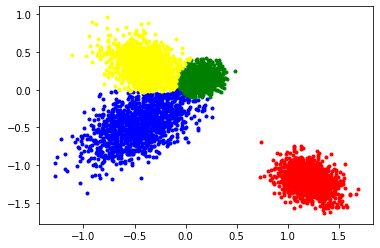

In [234]:
plt.scatter(cluster1_x, cluster1_y, marker='.', color='red')
plt.scatter(cluster2_x, cluster2_y, marker='.', color='green')
plt.scatter(cluster3_x, cluster3_y, marker='.', color='blue')
plt.scatter(cluster4_x, cluster4_y, marker='.', color='yellow')